In [120]:
from bokeh.plotting import figure, output_file, show
import pandas as pd
import datetime as dt
import numpy as np
import bokeh as bh
import bokeh.plotting as bp
from bokeh.io import output_notebook,vplot,gridplot
from bokeh.plotting import figure, output_file, show
output_notebook()

Loading BokehJS ...

In [13]:
rtsi_history = pd.read_csv('./raw_data/rtsi_history.csv',dtype={'DATE':str})
rtsi_history['DATE'] = [dt.datetime.strptime(date, '%Y%m%d').date() for date in rtsi_history['DATE']]

In [14]:
rtsi_history['LN_INC'] = np.log(rtsi_history.CLOSE/rtsi_history.CLOSE.shift(1))
rtsi_history['PLI_VOL_5'] = rtsi_history.LN_INC.rolling(window=5).agg(np.std)
rtsi_history['PLI_VOL_15'] = rtsi_history.LN_INC.rolling(window=15).agg(np.std)
rtsi_history['PLI_VOL_30'] = rtsi_history.LN_INC.rolling(window=30).agg(np.std)

In [15]:
rtsi_history.tail(3)

,TICKER,PER,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,LN_INC,PLI_VOL_5,PLI_VOL_15,PLI_VOL_30
5362,RTSI,D,2017-02-08,0,1176.11,1176.11,1157.83,1164.65,612630785,-0.012424,0.011440,0.012197,0.012385
5363,RTSI,D,2017-02-09,0,1165.93,1171.98,1155.27,1163.19,642795540,-0.001254,0.011239,0.011602,0.012388
5364,RTSI,D,2017-02-10,0,1163.05,1169.20,1157.21,1164.21,558025326,0.000877,0.006298,0.011602,0.012359


In [141]:
TOOLS = "xpan,xwheel_zoom,reset"
#DRAG = "xwheel_zoom"
def zones(plt,mi,ma):
    plt.quad(
    top = [ma,ma,ma],
    bottom=[mi,mi,mi],
    left = [dt.date(2007,10,2),dt.date(2009,12,1),dt.date(2011,12,2)],
    right=[dt.date(2009,11,30),dt.date(2011,12,1),dt.date(2016,7,3)],
    color=["red","green","violet"],alpha=0.2)


i = bp.figure(tools = TOOLS,plot_width=950, plot_height=250, x_axis_type="datetime", title='RTSI dynamic')
zones(i,0,2500)
i.line(rtsi_history['DATE'], rtsi_history['CLOSE'], line_width=1,line_color='green')
i.yaxis.axis_label = "Closing price"

l = bp.figure(tools = TOOLS,plot_width=950, plot_height=250, x_axis_type="datetime", x_range = i.x_range)
zones(l,-.22,.22)
l.line(rtsi_history['DATE'], rtsi_history['LN_INC'], line_width=1,line_color='blue')
l.yaxis.axis_label = "Log income"

v = bp.figure(tools = TOOLS,plot_width=950, plot_height=250, x_axis_type="datetime", x_range = i.x_range)
zones(v,0,.15)
v.line(rtsi_history['DATE'], rtsi_history['PLI_VOL_5'], line_width=1,line_color='red',alpha=0.5,legend = '5 days lag')
v.line(rtsi_history['DATE'], rtsi_history['PLI_VOL_15'], line_width=1,line_color='orange',alpha=0.5, legend = '15 days lag')
v.line(rtsi_history['DATE'], rtsi_history['PLI_VOL_30'], line_width=1,line_color='yellow',alpha=0.5, legend = '30 days lag')
v.yaxis.axis_label = "Volatility"
v.xaxis.axis_label = "Time"

bp.show(gridplot([i],[l],[v]))

In [17]:
rtsi_comp = pd.read_csv('./raw_data/rtsi_comp.csv')
rtsi_ticks = rtsi_comp['ticker'].tolist()
print(rtsi_ticks)

['AFKS', 'AFLT', 'AGRO', 'AKRN', 'ALRS', 'BANE', 'BANEP', 'CBOM', 'CHMF', 'DIXY', 'FEES', 'GAZP', 'GMKN', 'HYDR', 'IRAO', 'LKOH', 'LSRG', 'MAGN', 'MFON', 'MGNT', 'MOEX', 'MSNG', 'MTLR', 'MTSS', 'MVID', 'NLMK', 'NMTP', 'NVTK', 'PHOR', 'PIKK', 'PLZL', 'POLY', 'ROSN', 'RSTI', 'RTKM', 'RTKMP', 'RUAL', 'SBER', 'SBERP', 'SNGS', 'SNGSP', 'TATN', 'TATNP', 'TRNFP', 'UPRO', 'URKA', 'UWGN', 'VSMO', 'VTBR', 'YNDX']


In [18]:
new = True

for ticker in rtsi_ticks:
    d = pd.read_csv('./raw_data/quotes/'+ticker+'.csv')[['<DATE>','<CLOSE>']]
    d.columns = ['date',ticker]
    if new:
        df = d
        new = False
    else:
        df = df.merge(d)
df.tail(5)

,date,AFKS,AFLT,AGRO,AKRN,ALRS,BANE,BANEP,CBOM,CHMF,...,SNGSP,TATN,TATNP,TRNFP,UPRO,URKA,UWGN,VSMO,VTBR,YNDX
402,20170206,23.430,179.0,824.0,3460.0,104.20,3507.5,1420.0,4.273,955.9,...,35.190,401.95,227.4,199000.0,2.770,169.00,803.0,14630.0,0.06868,1357.5
403,20170207,24.190,173.5,830.0,3468.0,105.59,3575.0,1434.5,4.280,940.6,...,35.400,399.00,226.6,201500.0,2.803,169.10,802.5,14500.0,0.06879,1382.0
404,20170208,24.185,172.0,831.0,3500.0,104.80,3515.0,1420.0,4.250,932.0,...,35.105,406.00,227.6,187400.0,2.785,168.75,805.0,14200.0,0.06870,1350.0
405,20170209,24.200,178.5,824.0,3450.0,103.88,3780.5,1410.0,4.241,906.1,...,35.650,398.95,227.3,189100.0,2.758,170.00,805.5,14260.0,0.06870,1356.5
406,20170210,23.800,179.5,823.0,3452.0,103.50,3596.5,1400.0,4.246,909.8,...,34.700,398.30,224.8,189100.0,2.741,169.00,806.0,14160.0,0.06843,1345.0


In [60]:
cmx = df.iloc[:,1:].corr()
cmx

,AFKS,AFLT,AGRO,AKRN,ALRS,BANE,BANEP,CBOM,CHMF,DIXY,...,SNGSP,TATN,TATNP,TRNFP,UPRO,URKA,UWGN,VSMO,VTBR,YNDX
AFKS,1.000000,0.694871,-0.155363,0.105235,0.749426,0.711837,-0.174878,0.637034,0.652236,0.023885,...,-0.705172,0.469760,0.270576,0.139954,-0.053988,0.168432,0.521260,0.371539,-0.456704,0.647885
AFLT,0.694871,1.000000,0.157815,0.366340,0.905053,0.935364,-0.205619,0.945873,0.858865,-0.227110,...,-0.698216,0.795008,0.717985,0.361163,0.010436,-0.178681,0.826337,0.711712,-0.240204,0.705000
AGRO,-0.155363,0.157815,1.000000,0.822151,0.053131,0.310760,0.656324,0.151280,-0.089924,-0.405675,...,0.295811,0.146293,0.283578,0.585437,-0.321403,-0.204413,0.081743,0.338506,0.112949,0.386089
AKRN,0.105235,0.366340,0.822151,1.000000,0.186840,0.484026,0.602232,0.371289,0.119471,-0.337776,...,0.116895,0.295882,0.426752,0.636705,-0.074539,-0.007813,0.200646,0.566710,0.077502,0.572286
ALRS,0.749426,0.905053,0.053131,0.186840,1.000000,0.874341,-0.326630,0.839026,0.803513,-0.189839,...,-0.740672,0.714800,0.596855,0.302534,-0.228463,-0.186324,0.772682,0.588352,-0.284895,0.553729
BANE,0.711837,0.935364,0.310760,0.484026,0.874341,1.000000,0.033011,0.923218,0.776275,-0.166365,...,-0.657061,0.706147,0.594206,0.378133,-0.175959,-0.158433,0.721532,0.663178,-0.293376,0.811938
BANEP,-0.174878,-0.205619,0.656324,0.602232,-0.326630,0.033011,1.000000,-0.094131,-0.427894,0.175945,...,0.367447,-0.364259,-0.305003,0.072518,-0.240528,0.120469,-0.390866,-0.009430,0.090655,0.424573
CBOM,0.637034,0.945873,0.151280,0.371289,0.839026,0.923218,-0.094131,1.000000,0.810554,-0.044833,...,-0.753202,0.676558,0.589312,0.216834,0.022271,-0.116542,0.785179,0.694204,-0.234236,0.750419
CHMF,0.652236,0.858865,-0.089924,0.119471,0.803513,0.776275,-0.427894,0.810554,1.000000,-0.121989,...,-0.691917,0.833530,0.698152,0.263508,0.123770,-0.061856,0.834036,0.675440,-0.310471,0.457541
DIXY,0.023885,-0.227110,-0.405675,-0.337776,-0.189839,-0.166365,0.175945,-0.044833,-0.121989,1.000000,...,-0.255976,-0.443119,-0.546473,-0.690554,0.127554,0.241920,-0.221349,-0.352310,0.060834,0.074445


In [61]:
import networkx as nx
import matplotlib.pyplot as plt
import graphviz
#from networkx import graphviz_layout

In [116]:
G=nx.Graph()
leng = len(cmx.columns)
for i in range(leng):
    for j in range(i,leng):
        label_i = cmx.index[i]
        label_j = cmx.columns[j]
        if label_i!=label_j:
            w = cmx.iloc[j,i]
            if abs(w) > 0.95:
                G.add_edge(label_i,label_j,weight=w)
                #print(label_i,'=>',label_j,w)

In [117]:
elarge=[(u,v) for (u,v,d) in G.edges(data=True) if abs(d['weight']) >0.8]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if abs(d['weight']) <=0.8]

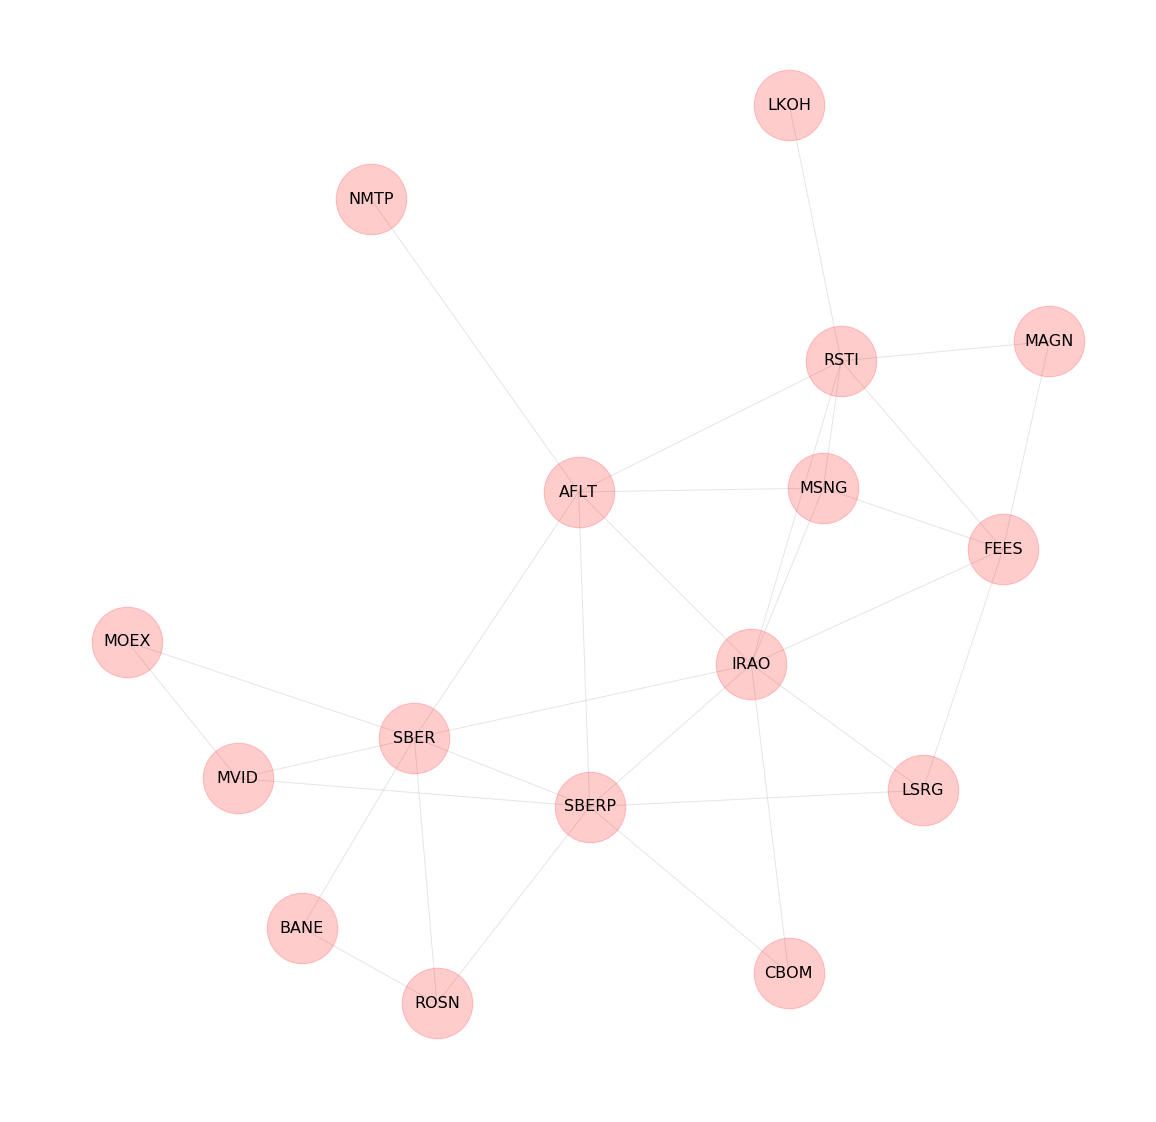

In [118]:
plt.figure(figsize=(20,20))
pos=nx.spring_layout(G,k=0.2,iterations=10000) # positions for all nodes
#pos = nx.spectral_layout(G)
#pos = nx.graphviz_layout(G)

# nodes
nx.draw_networkx_nodes(G,pos,node_size=5000,alpha=0.2)

# edges
nx.draw_networkx_edges(G,pos,edgelist=elarge,width=1,alpha=0.1)
#nx.draw_networkx_edges(G,pos,edgelist=esmall,width=1,alpha=0.2,edge_color='b',style='dashed')

# labels
nx.draw_networkx_labels(G,pos,font_size=16,font_family='sans-serif')

plt.axis('off')
plt.savefig("weighted_graph.png") # save as png
plt.show() # display

In [ ]:
plt.figure(figsize=(20,20))
nx.draw_shell(G)
plt.show()